In [1]:
#Import the relevant libraries
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brainData = pd.read_csv("~/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels.csv")
#brainData.head()

subList = brainData.SubID

In [3]:
#Load in the demographic dataset
demographicData = pd.read_csv('oasis2_longitudinal_demographics.csv')
demographicData = demographicData[demographicData["Subject ID"].isin(subList)]
#Show the head of the data
demographicData.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032


In [4]:
#x = brainData.drop(["SubID"],axis=1)
#x.head()

In [5]:
#Filter so it's only the third visit
demographicData3 = demographicData[demographicData.Visit ==3]

demographicData3.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
21,OAS2_0012,OAS2_0012_MR3,Nondemented,3,1598,F,R,83,16,2.0,29.0,0.0,1323,0.718,1.327
24,OAS2_0013,OAS2_0013_MR3,Nondemented,3,1456,F,R,85,12,4.0,29.0,0.0,1225,0.710,1.433


In [6]:
#Filter so it's only the third visit
demographicData1 = demographicData[demographicData.Visit ==1]

demographicData1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
19,OAS2_0012,OAS2_0012_MR1,Nondemented,1,0,F,R,78,16,2.0,29.0,0.0,1333,0.748,1.316
22,OAS2_0013,OAS2_0013_MR1,Nondemented,1,0,F,R,81,12,4.0,30.0,0.0,1230,0.715,1.427


In [7]:
#save as a CSV File
demographicData1 = demographicData[demographicData.Visit ==1]

demographicData1.head()

outputFile = '/home/jovyan/high-dimensionality-prediction/DataCSVs/symptoms_time1.csv'
demographicData1.to_csv(outputFile,mode='w')

In [8]:
#Establish the variables we are fitting torwards
y_MMSE = demographicData3['MMSE']
y_CDR = demographicData3['CDR']

In [9]:
symptoms_time1 = pd.read_csv("~/high-dimensionality-prediction/DataCSVs/symptoms_time1.csv")
#combined_demographicData = brainData.join(symptoms_time1)
# Select a subset of columns from df2 to join (e.g., 'City')
#demo_subset = symptoms_time1['MMSE','CDR']

# Merge df1 with the subset of df2 on the 'ID' column
#merged_df = df1.merge(df2_subset, on='ID', how='left')

brainData['MMSE_1'] = symptoms_time1['MMSE']
brainData['CDR_1'] = symptoms_time1['CDR']

print(brainData)

#combined_demographicData = brainData.join(symptoms_time1.index[c])
#combined_outputFile = '/home/jovyan/high-dimensionality-prediction/DataCSVs/combined_outputFile.csv'
#combined_demographicData.to_csv(combined_outputFile,mode='w')

        SubID  Amygdala       CSF  Cerebellum-Cortex  Cerebral-White-Matter  \
0   OAS2_0002  0.013411  0.013012           0.670648               2.810097   
1   OAS2_0005  0.020820  0.011194           0.695360               2.347708   
2   OAS2_0007  0.013560  0.008178           0.665194               2.122003   
3   OAS2_0012  0.014871  0.006080           0.525045               2.204806   
4   OAS2_0013  0.017291  0.008839           0.481546               1.858681   
5   OAS2_0017  0.018942  0.006843           0.686717               2.975571   
6   OAS2_0018  0.014442  0.009686           0.567007               2.040011   
7   OAS2_0020  0.017947  0.008953           0.602531               2.416813   
8   OAS2_0027  0.016391  0.006533           0.545305               2.242732   
9   OAS2_0031  0.015938  0.007957           0.587273               2.108294   
10  OAS2_0034  0.013542  0.010085           0.641602               1.885909   
11  OAS2_0036  0.016642  0.008029           0.612092

In [10]:
x = brainData.drop(["SubID"],axis=1)
x.head()

,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,entorhinal,fusiform,...,lateraloccipital,lingual,middletemporal,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal,MMSE_1,CDR_1
0,0.013411,0.013012,0.670648,2.810097,0.036919,0.016683,0.290358,0.029188,0.012332,0.075644,...,0.184125,0.085062,0.113225,0.145561,0.119919,0.303358,0.178874,0.122243,23.0,0.5
1,0.020820,0.011194,0.695360,2.347708,0.050914,0.021893,0.344998,0.158393,0.020593,0.078803,...,0.139672,0.072730,0.145441,0.130904,0.116813,0.273389,0.158525,0.104880,28.0,0.0
2,0.013560,0.008178,0.665194,2.122003,0.038385,0.009716,0.189054,0.026453,0.011384,0.076962,...,0.114560,0.068641,0.129610,0.136441,0.081545,0.283527,0.160950,0.105816,28.0,0.5
3,0.014871,0.006080,0.525045,2.204806,0.041997,0.010264,0.126082,0.061315,0.014693,0.062031,...,0.114548,0.058055,0.119239,0.125396,0.089896,0.228536,0.162041,0.096339,29.0,0.0
4,0.017291,0.008839,0.481546,1.858681,0.038683,0.008559,0.208080,0.024241,0.013155,0.067306,...,0.130630,0.064933,0.116634,0.127900,0.090230,0.231630,0.166547,0.089335,30.0,0.0


In [11]:

#This function splits the x data and y data into training and testing cohorts (50% go to test cohort)
xTrain_MMSE, xTest_MMSE, MMSE_Train, MMSE_Test = train_test_split(x, y_MMSE, test_size=0.5)
xTrain_CDR, xTest_CDR, CDR_Train, CDR_Test = train_test_split(x, y_CDR, test_size=0.5)

In [12]:
#Functions for training the SVM and the RF

def runSVM(xTraining, yTraining, xTesting, yTesting, kernelType, tuneHyperparameters):
    svRegress = svm.SVR(kernel=kernelType,epsilon=.5,C=100)
    svRegress.fit(xTraining,yTraining)
    svRegress_predict = svRegress.predict(xTesting)
    #svRegress_acc = metrics.accuracy_score(yTesting, svRegress_predict)
    return svRegress, svRegress_predict

def runRF(xTraining, yTraining, xTesting, yTesting, tuneHyperparameters):
    randForest = MMSE_Forest = RandomForestRegressor()
    randForest.fit(xTraining,yTraining)
    randForest_predict = randForest.predict(xTesting)
    #randForest_acc = metrics.accuracy_score(yTesting, randForest_predict)
    return randForest, randForest_predict

Text(18, 18, 'MSE equals: 6.2894')

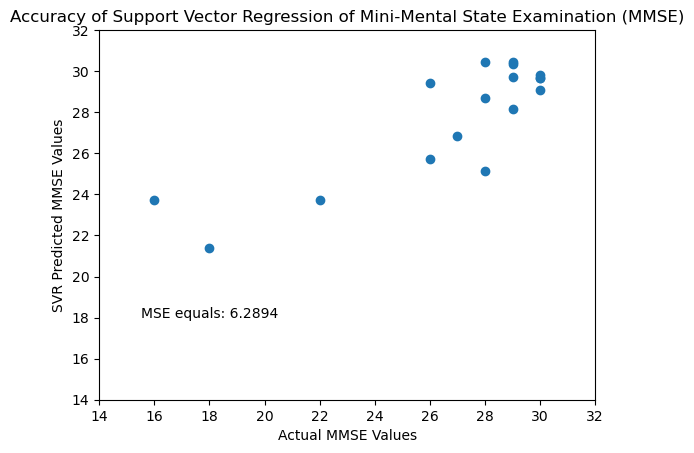

In [13]:
#Create the SVC to predict MMSE
MMSE_SVR, MMSE_SVR_predict = runSVM(xTrain_MMSE, MMSE_Train, xTest_MMSE, MMSE_Test, 'linear', False)
#print("Support Vector Regression MMSE Accuracy: ", MMRE_SVR_acc)
plt.scatter(MMSE_Test, MMSE_SVR_predict)
plt.title("Accuracy of Support Vector Regression of Mini-Mental State Examination (MMSE)")
plt.xlabel("Actual MMSE Values")
plt.ylabel("SVR Predicted MMSE Values")
plt.xlim(14,32)
plt.ylim(14,32)

mse = mean_squared_error(MMSE_Test, MMSE_SVR_predict)
mseText = "MSE equals: {:.4f}".format(mse)
plt.text(18, 18, mseText, ha='center')

Text(0.2, 0.05, 'MSE equals: 0.2059')

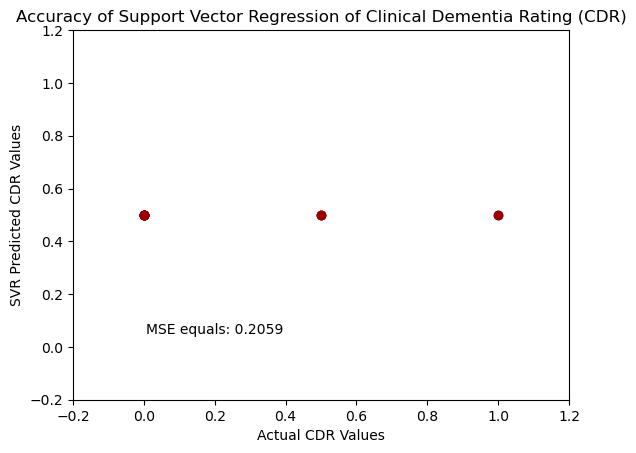

In [14]:
#Create the SVC to predict CDR
CDR_SVR, CDR_SVR_predict= runSVM(xTrain_CDR, CDR_Train, xTest_CDR, CDR_Test, 'linear', False)
plt.scatter(CDR_Test, CDR_SVR_predict,c="#990000")
plt.title("Accuracy of Support Vector Regression of Clinical Dementia Rating (CDR)")
plt.xlabel("Actual CDR Values")
plt.ylabel("SVR Predicted CDR Values")
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
mse = mean_squared_error(CDR_Test, CDR_SVR_predict)
mseText = "MSE equals: {:.4f}".format(mse)
plt.text(.2, .05, mseText, ha='center')


Text(18, 18, 'MSE equals: 10.9162')

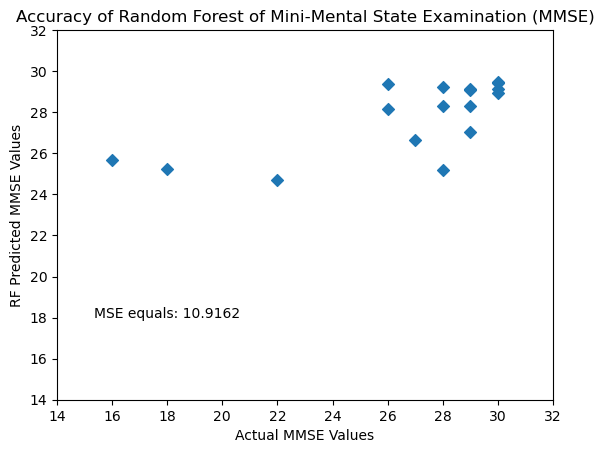

In [15]:
#Create the RF to predict MMSE
MMSE_RF, MMSE_RF_predict = runRF(xTrain_MMSE, MMSE_Train, xTest_MMSE, MMSE_Test, False)
plt.scatter(MMSE_Test, MMSE_RF_predict, marker="D")
plt.title("Accuracy of Random Forest of Mini-Mental State Examination (MMSE)")
plt.xlabel("Actual MMSE Values")
plt.ylabel("RF Predicted MMSE Values")
plt.xlim(14,32)
plt.ylim(14,32)
mse = mean_squared_error(MMSE_Test, MMSE_RF_predict)
mseText = "MSE equals: {:.4f}".format(mse)
plt.text(18, 18, mseText, ha='center')

Text(0.2, 1, 'MSE equals: 0.0848')

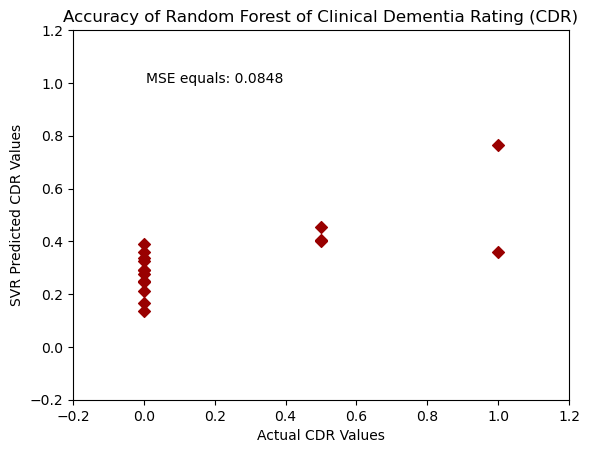

In [16]:
#Create the RF to predict CDR
CDR_RF, CDR_RF_predict = runRF(xTrain_CDR, CDR_Train, xTest_CDR, CDR_Test, False)
plt.scatter(CDR_Test, CDR_RF_predict, marker="D",c="#990000")
plt.title("Accuracy of Random Forest of Clinical Dementia Rating (CDR)")
plt.xlabel("Actual CDR Values")
plt.ylabel("SVR Predicted CDR Values")
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
mse = mean_squared_error(CDR_Test, CDR_RF_predict)
mseText = "MSE equals: {:.4f}".format(mse)
plt.text(.2, 1, mseText, ha='center')